In [2]:
!pip install numpy pandas matplotlib seaborn scipy scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd


# Substitua 'seu_arquivo.csv' pelo caminho do seu arquivo CSV
data_base_imoveis = 'train.csv'

# Use a função read_csv para ler o arquivo CSV
df = pd.read_csv(data_base_imoveis)

# Exiba as primeiras linhas do DataFrame para verificar se os dados foram carregados corretam df.head())
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [7]:
eliminar= df.columns[(df.isnull().sum()/df.shape[0])>0.1]
eliminar

df= df.drop(eliminar,axis=1)
print(df)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0   

In [8]:
colunas = df.columns[df.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
df2 = df.loc[:,colunas]
df2.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
df2.isnull().sum().sort_values(ascending=False).head(3)

GarageYrBlt    81
MasVnrArea      8
Id              0
dtype: int64

In [11]:
df2 = df2.fillna(-1)

In [12]:
x = df2.drop('SalePrice',axis=1)

y = df2.SalePrice

from sklearn.model_selection import train_test_split

import numpy as np 

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [13]:
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

# MODELO DE REGRESSSÃO EM LINEAR
reg_rl = LinearRegression().fit(X_train, y_train)

y_rl = reg_rl.predict(X_test)

reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# FAZENDO PREVISÃO 
y_ar = reg_ar.predict(X_test)

reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

y_knn = reg_knn.predict(X_test)


c:\Users\will-\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\will-\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_absolute_error(y_test,y_rl))
print(mean_squared_error(y_test,y_rl))


23763.187393064614
1533982883.4448636


In [15]:
import matplotlib.pyplot as plt

#ARVORA DE DECISÃO
print(mean_absolute_error(y_test,y_ar))
print(mean_squared_error(y_test,y_ar))

#KN DE DECISÃO 
print(mean_absolute_error(y_test,y_knn))
print(mean_squared_error(y_test,y_knn))


27580.78838174274
2530245114.701245
33273.08298755187
2733937586.841286


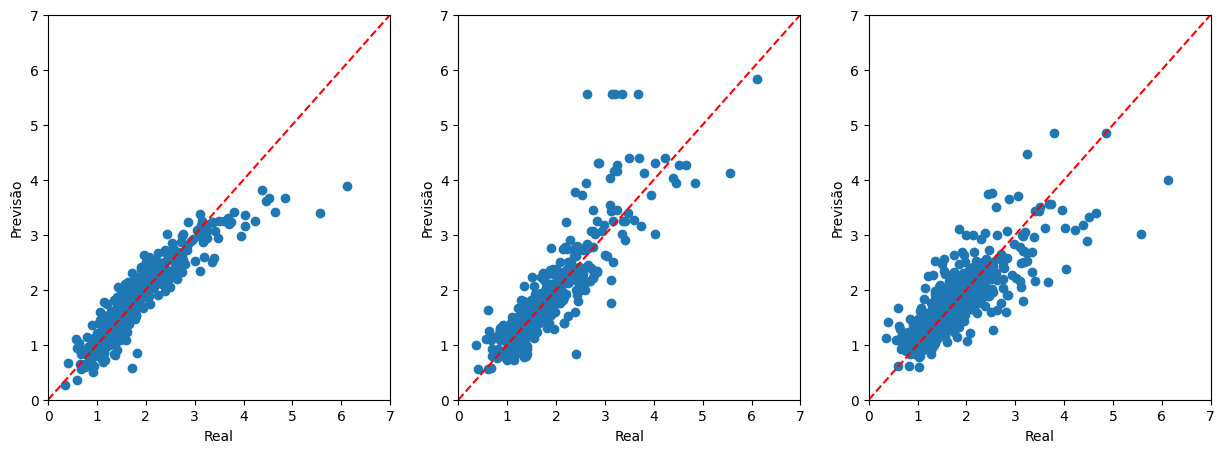

In [16]:
#CRIANDO GRAFICO 
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000,y_rl/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_test/100000,y_ar/100000)
ax[1].plot([0,700000],[0,700000],'--r')
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,700000],[0,700000],'--r')
ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')
plt.show()

In [17]:
data_base_teste = pd.read_csv('test.csv')
data_base_teste.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [18]:
data_base_teste = data_base_teste.drop(eliminar,axis=1)
colunas2 = data_base_teste.columns[data_base_teste.dtypes != 'object']

colunas2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [19]:
data_base_teste = data_base_teste.loc[:,colunas2]
data_base_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [20]:
data_base_teste.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
dtype: int64

In [21]:
data_base_teste = data_base_teste.fillna(-1)

In [22]:
# MODELO AJUSTADO DE DADOS PARA USARMOS DE PREVISÃO
# REGRESSÃO LINEAR 
y_pred = reg_rl.predict(data_base_teste)


data_base_teste['SalePrice'] = y_pred

resultado = data_base_teste[['Id','SalePrice']]

resultado.head(5)


,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251
3,1464,199138.801656
4,1465,196257.109229


In [23]:
resultado.to_csv('resultado.csv',index=False)
